## 1. Introduction

### 1.1 Questions to be answer

## 2. Data Wrangling

### 2.1 Loading Data from CSV into a DataFrame

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%pylab inline
import seaborn as sns
sns.set_style("whitegrid")

titanic_df = pd.read_csv('titanic_data.csv',header=0)

Populating the interactive namespace from numpy and matplotlib


In [2]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### 2.2 Fixing Data Types

In [3]:
# Convert the columns into strings
titanic_df['PassengerId'] = titanic_df['PassengerId'].astype(str)
titanic_df['Pclass'] = titanic_df['Pclass'].astype(str)

# Convert the columns into integers
titanic_df['SibSp'] = titanic_df['SibSp'].astype(int)
titanic_df['Parch'] = titanic_df['Parch'].astype(int)

# Convert the columns into floats
titanic_df['Age'] = titanic_df['Age'].astype(float)
titanic_df['Fare'] = titanic_df['Fare'].astype(float)

# Takes a integer which is either 1 or 0 and returns its respective boolean value
d = {1:True, 0:False}
titanic_df['Survived'] = titanic_df['Survived'].map(d)

titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,False,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,True,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,True,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,True,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,False,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
# VARIABLE:       DESCRIPTION:
# survival        Survival
#                 (False = No; True = Yes)
# pclass          Passenger Class
#                 (1 = 1st; 2 = 2nd; 3 = 3rd)
# name            Name
# sex             Sex
# age             Age is in Years
# sibsp           Number of Siblings/Spouses Aboard
# parch           Number of Parents/Children Aboard
# ticket          Ticket Number
# fare            Passenger Fare
# cabin           Cabin
# embarked        Port of Embarkation
#                 (C = Cherbourg; Q = Queenstown; S = Southampton)

### 2.3 Pre-analysis of the Data

In [5]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null object
Survived       891 non-null bool
Pclass         891 non-null object
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int32
Parch          891 non-null int32
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: bool(1), float64(2), int32(2), object(7)
memory usage: 70.5+ KB


## 3. Exploring the Data

### 3.1 Number of Families on Board

In [6]:
# Returns the last name of the passenger name which represents the family
def family_name(names):
    split_name = names.split(",")
    last_name = split_name[0]
    return last_name

# Returns the family name data with duplicate rows removed
unique_families = titanic_df['Name'].apply(family_name).drop_duplicates()

# See how many unique families embarked
len(unique_families)

667

### 3.2 Family Size Analysis

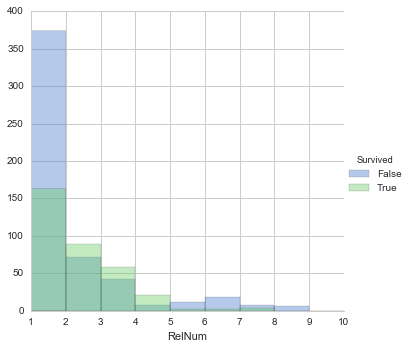

In [7]:
# Create a column with the total number of relatives
# Adding the number of Siblings/Spouses with the number of Parents/Children and the passengers themselves
titanic_df['RelNum'] = titanic_df['SibSp'] + titanic_df['Parch'] + 1
relatives_num = titanic_df['RelNum'].value_counts()

# Plot the relationship between Survived and RelNum in a histogram using FacetGrid 
grid_family = sns.FacetGrid(titanic_df, size=5, hue="Survived", palette="muted")
start = titanic_df['RelNum'].min()
stop = titanic_df['RelNum'].max()
step = 1
bins = np.arange(start, stop, step)
grid_family.map(plt.hist,"RelNum", bins=bins, alpha=0.4)
grid_family.add_legend()

### 3.3 Investigating the Age Group

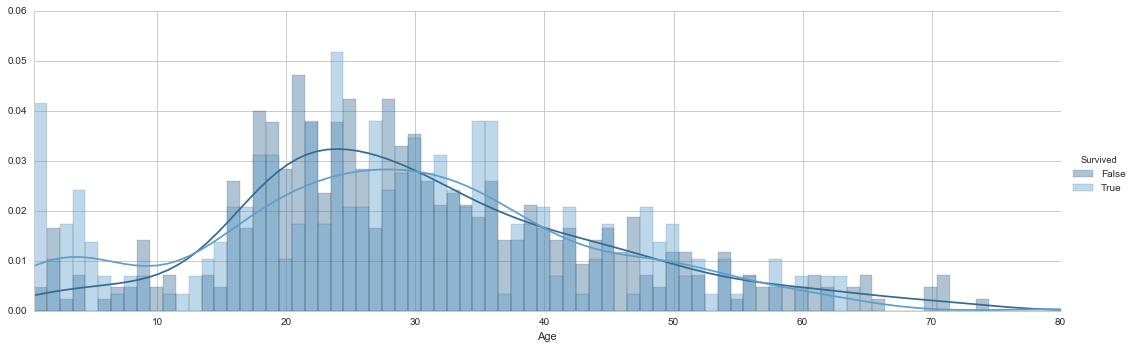

In [8]:
# Returns the data with all missings values removed
titanic_df['Age'] = titanic_df['Age'].dropna()

# Plot the relationship between Age and Survived
start = titanic_df['Age'].min()
stop = titanic_df['Age'].max()
step = 1
bins = np.arange(start, stop, step)
grid_age = sns.FacetGrid(titanic_df, size=5, aspect=3, hue="Survived",palette="Blues_d",xlim=(start,stop))
grid_age.map(sns.distplot, "Age", bins=bins)
grid_age.add_legend()

### 3.4 Comparing the Passenger Fare with Passenger Class

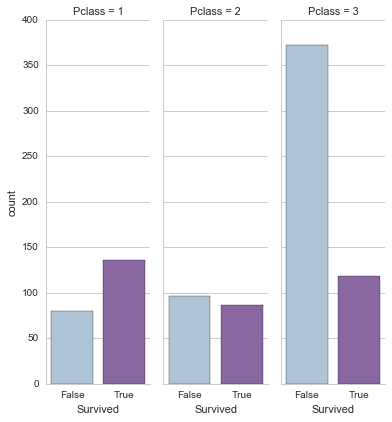

In [9]:
# Draw a count plot to show the number of survived passengers of each class
sns.factorplot("Survived", col="Pclass", col_wrap=3, data=titanic_df, kind="count", palette="BuPu", size=6, aspect=.3)

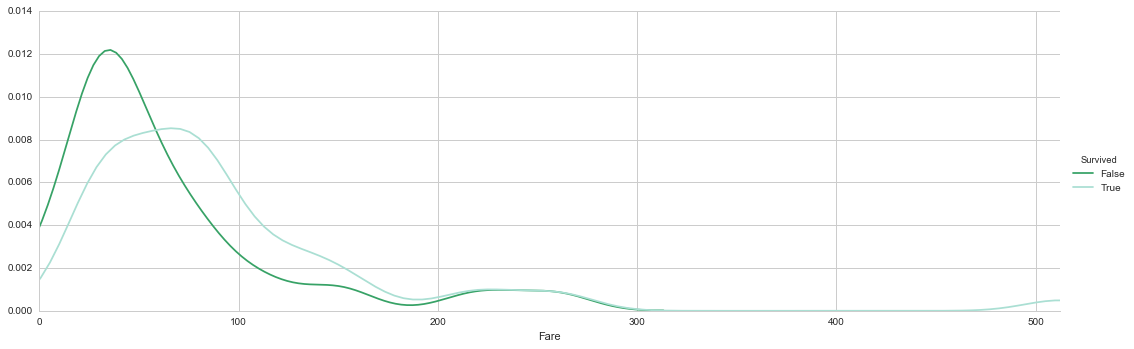

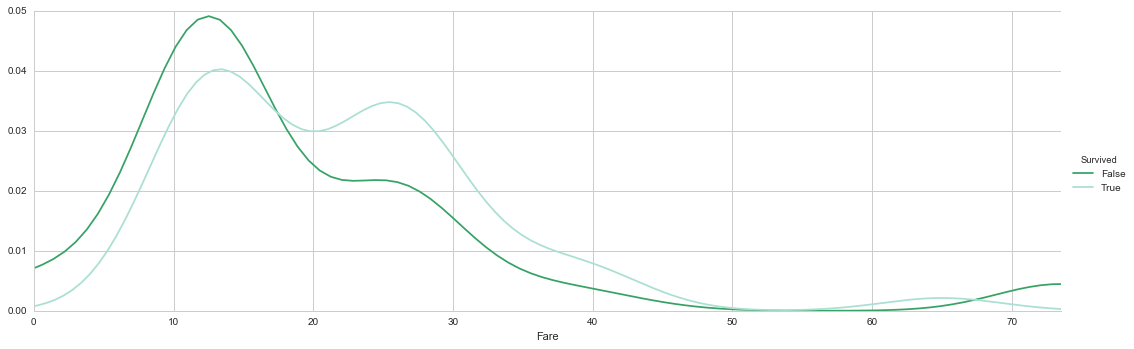

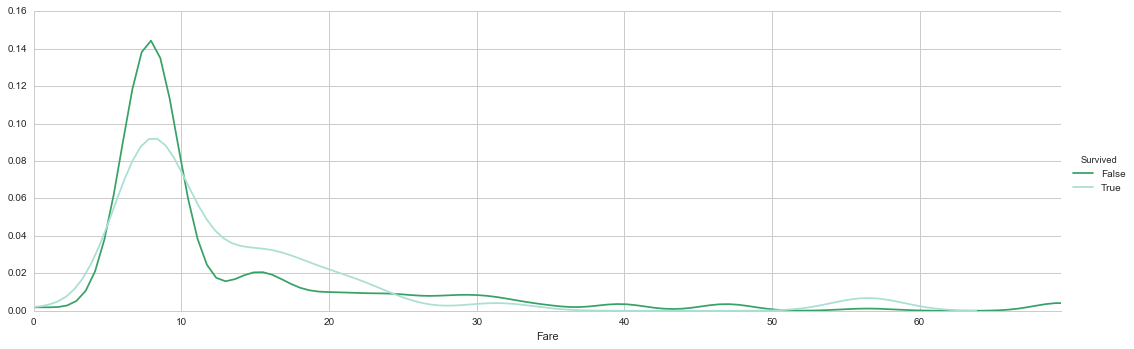

In [10]:
# Plot a kernel density estimation of the passenger fare variable of each passenger class
def plot_fare_class(p_class):
    # Group the titanic data by the class column and create a list of passengers with the given class
    class_group = titanic_df.groupby(['Pclass'])
    passenger_list = class_group.groups[p_class]

    # Create a new DataFrame of the passenger fare for the given class
    fare_df = pd.DataFrame(titanic_df['Fare'].iloc[passenger_list])

    # Create a survived column in the DataFrame based on the given class
    fare_df['Survived'] = titanic_df['Survived'].iloc[fare_df.index]
    
    # Plot the relationship between Fare and Survived with separete classes
    start = fare_df['Fare'].min()
    stop = fare_df['Fare'].max()
    step = 1
    bins = np.arange(start, stop, step)
    grid2 = sns.FacetGrid(fare_df, size=5, aspect=3, hue="Survived",palette="BuGn_r",xlim=(start,stop))
    grid2.map(sns.distplot, "Fare", bins=bins, kde=True, hist=False)
    grid2.add_legend()
    return

plot_fare_class('1')
plot_fare_class('2')
plot_fare_class('3')

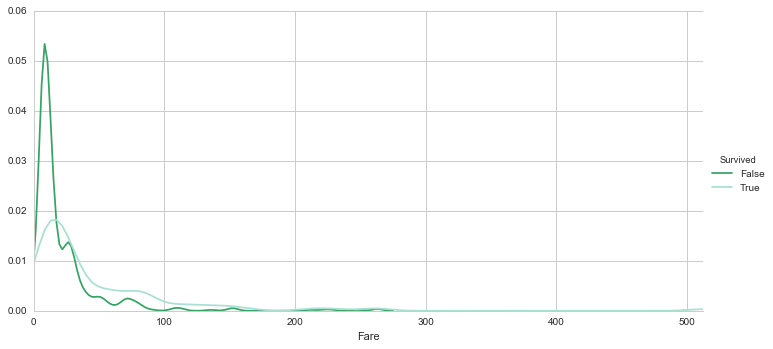

In [11]:
# Create a new DataFrame of passenger fare and add the survived column
fare_df = pd.DataFrame(titanic_df['Fare'])
fare_df['Survived'] = titanic_df['Survived']

# Plot the relationship between Fare and Survived in a unique graph
start = fare_df['Fare'].min()
stop = fare_df['Fare'].max()
step = 1
bins = np.arange(start, stop, step)
grid_fare = sns.FacetGrid(fare_df, size=5, aspect=2, hue="Survived",palette="BuGn_r",xlim=(start,stop))
grid_fare.map(sns.distplot, "Fare", bins=bins, kde=True, hist=False)
grid_fare.add_legend()

(0.71903525054660689, 1.2022351888495418e-142)

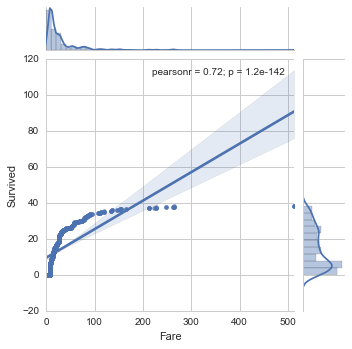

In [12]:
# Create a new DataFrame of passenger fare with the values in ascending order
fare_df = pd.DataFrame(titanic_df['Fare'].sort_values(ascending=True))

# Add a survived column in the DataFrame with the values in the same order of the fare column
fare_df['Survived'] = titanic_df['Survived'].iloc[fare_df.index]

# Convert the values of the survived column in a cumulative percentage
number_of_passengers = len(fare_df)
fare_df['Survived'] = 100*fare_df['Survived'].cumsum()/number_of_passengers

# Plot the linear regression to see the correlation of the fare variable with survived variable
lim_sup = fare_df['Fare'].max()
lim_inf = fare_df['Fare'].min()
sns.jointplot(x="Fare", y="Survived", data=fare_df, kind='reg', xlim=(lim_inf, lim_sup), size=5)

# Calculate the Pearson correlation coefficient 
from scipy import stats
stats.pearsonr(fare_df['Fare'], fare_df['Survived'])

## 4. Conclusions